# IMPORTS
## PACKAGES

In [1]:
# Import des librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast
import pickle
import time
import string
import logging
from collections import Counter
logging.disable(logging.WARNING)

In [2]:
import nltk
from sklearn import cluster, metrics
from sklearn import manifold, decomposition, model_selection, preprocessing
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import jaccard_score
from nltk.stem import WordNetLemmatizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('words')
#nltk.download('wordnet')
#nltk.download('popular')

In [27]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
import re
# as per recommendation from @freylis, compile once only
CLEANR = re.compile('<(?s:.)*?>') 

In [4]:
from collections import Counter

In [5]:
path = '/Users/souha_kassab/OC_P5/static/csv/'

In [35]:
stop

## HELPERS

In [6]:
# GET RID OF ALL LINE-RETURNS IN TEXT
def strip_patterns(test):
    formatted_text = test
    for pattern in ['\n']:
        formatted_text = formatted_text.replace(pattern, "")
    return formatted_text
# ------------------------ #
# CLEAN TEXT FROM HTML FORMATTING
def cleanhtml(raw_html):
    cleantext = re.sub(CLEANR, '', raw_html)
    return cleantext
# ------------------------ # 
# CLEAN TAGS COLUMN
def tag_words(tag_row):
    tag1= tag_row.replace("<", "").split(">")
    tag1.remove("")
    return tag1

In [ ]:
# need to lower all cols title (from P3 notebooks)

In [8]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [14]:
def boxPlotAll(df):
    '''Show box plots for each feature'''
    
    # Select just the numeric features
    df = df.select_dtypes(include=[np.number])

    # Compute the layout grid size
    data_cols = len(df.columns)
    unit_size = 5
    layout_cols = 4
    layout_rows = int(data_cols/layout_cols+layout_cols)

    # Make the plots
    df.plot(kind='box', subplots=True, figsize=(layout_cols*unit_size+1,layout_rows*unit_size+1), layout=(layout_rows,layout_cols))

    plt.show()
    # -------------------------------------------------------------- # 
# Function to plot numerical data distribution
def histplotall(df):
    '''Show histograms for each feature''' 
    # Select just the numeric features
    df = df.select_dtypes(include=[np.number])
    nb_of_bins_Sturges=np.round(1+np.log2(len(df)))
    # Compute the layout grid size
    data_cols = len(df.columns)
    unit_size = 5
    layout_cols = 4
    layout_rows = int(data_cols/layout_cols+layout_cols)

    # Make the plots
    df.hist(figsize=(layout_cols*unit_size,layout_rows*unit_size), layout=(layout_rows,layout_cols),
           bins = int(nb_of_bins_Sturges))
    #plt.title(plot_title)       
    plt.show() 

## CORPUS

In [7]:
small_df = pd.read_csv('/Users/souha_kassab/OC_P5/static/csv/REDUCED_Multiclass_data_80pcent_tags.csv', 
                       index_col=[0], low_memory=False)
small_df.head()

,AnswerCount,Title_bow,Body_bow,Body_bow_lem,Title_bow_lem,Tags_words,unique_commn_tag,unique_rare_tag,unique_tag,concatenated_query_bow_lem
0,5,get content span,get contents span looking way vanilla jqueryja...,get content span looking way vanilla jqueryjav...,get content span,"['javascript', 'jquery', 'html', 'forms', 'con...",javascript,contenteditable,javascript,get content span get content span looking way ...
18,2,modules import destructuring performances,recently read material docs notice example use...,recently read material doc notice example used...,module import destructuring performance,"['javascript', 'performance', 'module', 'webpa...",javascript,babeljs,javascript,module import destructuring performance recent...
32,4,what best way communicate mysql server,going would like know best way talk mysql serv...,going would like know best way talk mysql serv...,best way communicate mysql server,"['c++', 'sql', 'mysql', 'c', 'database']",c++,database,c++,best way communicate mysql server going would ...
51,4,swift how expand tilde path string,how expand path string tilde swift string like...,expand path string tilde swift string like des...,swift expand tilde path string,"['swift', 'path', 'nsfilemanager', 'home-direc...",swift,tilde-expansion,NaN,swift expand tilde path string expand path str...
66,3,how prevent dbcontext altering database,learning entity framework currently ef6 beta c...,learning entity framework currently ef6 beta c...,prevent dbcontext altering database,"['.net', 'database', 'entity-framework', 'orm'...",.net,code-first,.net,prevent dbcontext altering database learning e...


# Data prep
## Cleaning

In [9]:
# METHOD TO COMPUTE MEMORY USAGE DURING AN OPERATION
BYTES_TO_MB_DIV = 0.000001
def print_memory_usage_of_data_frame(df):
    mem = round(df.memory_usage().sum() * BYTES_TO_MB_DIV, 3) 
    print("Memory usage is " + str(mem) + " MB")
    
print_memory_usage_of_data_frame(small_df)

Memory usage is 0.34 MB


In [10]:

small_df['Tags_words'] = small_df['Tags_words'].apply(lambda x: ast.literal_eval(x))

In [11]:
small_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3864 entries, 0 to 49991
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   AnswerCount                 3864 non-null   int64 
 1   Title_bow                   3864 non-null   object
 2   Body_bow                    3864 non-null   object
 3   Body_bow_lem                3864 non-null   object
 4   Title_bow_lem               3864 non-null   object
 5   Tags_words                  3864 non-null   object
 6   unique_commn_tag            3864 non-null   object
 7   unique_rare_tag             3863 non-null   object
 8   unique_tag                  3049 non-null   object
 9   concatenated_query_bow_lem  3864 non-null   object
dtypes: int64(1), object(9)
memory usage: 332.1+ KB


In [12]:
small_df.dropna(inplace=True)

In [13]:
small_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3048 entries, 0 to 49991
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   AnswerCount                 3048 non-null   int64 
 1   Title_bow                   3048 non-null   object
 2   Body_bow                    3048 non-null   object
 3   Body_bow_lem                3048 non-null   object
 4   Title_bow_lem               3048 non-null   object
 5   Tags_words                  3048 non-null   object
 6   unique_commn_tag            3048 non-null   object
 7   unique_rare_tag             3048 non-null   object
 8   unique_tag                  3048 non-null   object
 9   concatenated_query_bow_lem  3048 non-null   object
dtypes: int64(1), object(9)
memory usage: 261.9+ KB


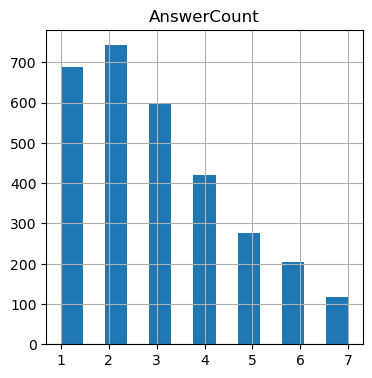

In [15]:
histplotall(small_df)

# test with small dataset

In [16]:
X = (small_df.loc[:, 'concatenated_query_bow_lem']).values
print(X.shape)
y = ((small_df.loc[:, 'Tags_words']).values).flatten()
print(y.shape)
values = (small_df.loc[:, 'Tags_words']).value_counts()/(small_df.loc[:, 'Tags_words']).shape[0]
y

(3048,)
(3048,)


array([list(['javascript', 'jquery', 'html', 'forms', 'contenteditable']),
       list(['javascript', 'performance', 'module', 'webpack', 'babeljs']),
       list(['c++', 'sql', 'mysql', 'c', 'database']), ...,
       list(['c#', 'arrays', 'reflection', 'collections', 'casting']),
       list(['c#', 'ef-code-first', 'foreign-keys', 'data-annotations', 'entity-framework-6']),
       list(['python', 'plot', 'graphics', 'anaconda', 'spyder'])],
      dtype=object)

In [20]:
print(X[:10])
yy=list(small_df['Tags_words'])
#type(((small_df.loc[:, 'Tags_words']).values).flatten())
#type(((small_df.loc[:, 'Tags_words']).values))


In [ ]:
# TEST CELL #
#(small_df.unique_tag)


In [19]:
#[item for sublist in small_df['Tags_words'] for item in sublist]
#[item for item in small_df['Tags_words']]
blehbleh = [item for item in small_df['Tags_words'][0]]
#X, y = make_multilabel_classification(n_classes=3, random_state=0)
print(blehbleh)
enumerate(small_df['Tags_words'][0])

['javascript', 'jquery', 'html', 'forms', 'contenteditable']


## test using MultilabelBinarizer and OneVsRestClassifier

In [296]:
# DATA SPLIT INTO TEST AND GRAIN
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.3,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2163,) (927,) (2163,) (927,)


In [ ]:

mlb = MultiLabelBinarizer()
mlb

In [ ]:
mlb.fit(y)
print(mlb.classes_)
(len(mlb.classes_))


In [247]:
# regarder le F1score avec une prédiction d'un tag, de deux ou de trois.
## cross-validation to-do
#classif = OneVsRestClassifier(SVC(kernel="linear", probability=True))
classif_lr = OneVsRestClassifier(LogisticRegression(C= 10.0, penalty="l1", solver="liblinear"))
classif_lr.fit(df_train_x, y_train)

/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 6 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 7 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 11 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 16 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklea

/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 242 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 243 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 248 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 254 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 257 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py

/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 489 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 497 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 500 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 501 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 526 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py

/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 811 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 812 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 818 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 820 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages

/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 1077 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 1086 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 1102 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 1116 is present in all training examples.
  warnings.warn(
/Users/souha_kassab/opt/miniconda3/envs/oc_p5/lib/python3.9/site-pack

OneVsRestClassifier(estimator=LogisticRegression(C=10.0, penalty='l1',
                                                 solver='liblinear'))

In [248]:
accuracy_score(y_test, classif_lr.predict((df_test_x)))

0.019417475728155338

In [ ]:
#classif.predict(df_test_x)
metrics.accuracy_score(y_test, classif_lr.predict((df_test_x)))

In [ ]:
test = ['Does python likes c++ as much as ios likes linux?']
test_vct = pd.DataFrame(tf_vect.transform(test).todense(), columns=tf_vect.get_feature_names_out())
pd.DataFrame(classif_lr.predict(test_vct)[0])

***Comment*** Not filtering results in very poor performance of classifier!

In [30]:
def filter_tags(x, nb_tags):
    return [item for item in x if item in TAGSlist_to_predict[:nb_tags]]
#filter_tags(gaus_data.loc[0, 'Tags_words'])
small_df['Target_tags'] = small_df['Tags_words'].apply(lambda x: filter_tags(x, 22))
small_df['Target_tags'].head()

0     [javascript, jquery, html]
18                  [javascript]
32                 [c++, sql, c]
66                        [.net]
81                    [c#, .net]
Name: Target_tags, dtype: object

## MultiOututClassifier class

In [24]:
#small_df['unique_commn_tag'].value_counts()
from collections import Counter
flat_list = list(small_df['unique_rare_tag'])
# because all most_common unique tags are 22
rarest_tags = [item[0] for item in Counter(flat_list).most_common(80)]
(list(small_df['unique_commn_tag'].unique()) + rarest_tags)

TAGSlist_to_predict = list(small_df['unique_commn_tag'].unique()) + rarest_tags
TAGSlist_to_predict

['javascript',
 'c++',
 '.net',
 'c#',
 'jquery',
 'python',
 'ios',
 'ruby-on-rails',
 'php',
 'java',
 'android',
 'html',
 'sql',
 'node.js',
 'c',
 'linux',
 'git',
 'objective-c',
 'iphone',
 'asp.net',
 'windows',
 'r',
 'asp.net-identity',
 'ajax',
 'ipad',
 'apk',
 'twitter-bootstrap',
 'orm',
 'cors',
 'visual-c++',
 'mobile-safari',
 'xcode6',
 'jquery-mobile',
 'marshalling',
 'try-catch',
 'locking',
 'queue',
 'structure',
 'clr',
 'google-cloud-functions',
 'javadoc',
 'ionic-framework',
 'pinvoke',
 'intellisense',
 'addressbook',
 'uikit',
 'iteration',
 'uibutton',
 'firebase-realtime-database',
 'scikit-learn',
 'smtplib',
 'zeromq',
 'singleton',
 'exif',
 'file-upload',
 'realm',
 'uiimagepickercontroller',
 'openmp',
 'if-statement',
 'react-redux',
 'controller',
 'qt-creator',
 'servlets',
 'cross-platform',
 'binary',
 'continuous-integration',
 'memcached',
 'cocoapods',
 'visual-studio-2005',
 'data-annotations',
 'foreign-keys',
 'decorator',
 'awk',
 'restte

In [36]:
# CLASS FOR COMPARING PERFORMANCE ACCORDING TO NUMBER OF TAGS (ACCURACY AND JACARD SCORE)
class Multi_tags_classification():
     # -------------------------------------------------------------- #     
    def __repr__(self):
        return f'Classification of {nb_tags} tags'
        # -------------------------------------------------------------- #  

    def filter_tags(self, x, nb_tags):
        return [item for item in x if item in TAGSlist_to_predict[:nb_tags]]
        # -------------------------------------------------------------- #  
    def two_scales(self, ax1, t, data1, data2, c1, c2):

        ax2 = ax1.twinx()

        ax1.plot(time, data1, color=c1)
        ax1.set_xlabel('time (s)')
        ax1.set_ylabel('Accuracy')

        ax2.plot(time, data2, color=c2)
        ax2.set_ylabel('Jaccard score')
        return ax1, ax2
        # Change color of each axis
    def color_y_axis(self, ax, color):
        """Color your axes."""
        for t in ax.get_yticklabels():
            t.set_color(color)
        return None
     # -------------------------------------------------------------- #  

    def __init__(self, df, X, min_range, max_range):
        #self.min_range = min_range
        #self.max_range = max_range
        #self.bow_vect = CountVectorizer(stop_words=stop_w, max_df=0.95, min_df=1)
        self.X = X
        # TF-IDF INSTANCE
        self.tf_vect = TfidfVectorizer(stop_words=stop_w, max_df=0.95, min_df=1)
        # Multilabel Binarizer instance
        mlb = MultiLabelBinarizer()
        self.LIST_clf_per_nb_tags = {}
        self.clf_time = []
        self.train_acc=[]
        self.ACC_clfs =[]
        self.JACCARD_clfs = []
        t1 = time.perf_counter() #monitor test time for different tags values
        for nb_tags in np.arange(min_range, max_range, 2):
            df['Target_tags'] = df['Tags_words'].apply(lambda x: filter_tags(x, nb_tags))
            self.y = small_df['Target_tags']
            # SPLIT DATA
            X_train, X_test, y_train,  y_test = train_test_split(self.X, self.y, test_size=0.3,random_state=42)
            print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
            # FEATURES EXTRACTION
            tf_fit = self.tf_vect.fit(X_train)
            tf_transform = tf_fit.transform(X_train)  
            df_train_x = pd.DataFrame(tf_transform.todense(), columns=self.tf_vect.get_feature_names_out())
            # TARGET BINARIZATION
            mlb_y = mlb.fit_transform(y_train)
            df_y = pd.DataFrame(mlb_y, columns=mlb.classes_)
            print("Learned tags:", mlb.classes_)
            clf = MultiOutputClassifier(LogisticRegression(C= 10.0, 
                                               penalty= 'l1', 
                                             solver= 'liblinear')).fit(df_train_x, df_y)
            t2 = time.perf_counter()
            self.clf_time.append(t2-t1)
            print(f"Multi-output classification time = {t2-t1} seconds")
            self.LIST_clf_per_nb_tags[nb_tags] = clf
            test_y =mlb.transform(y_test)
            df_test_x = pd.DataFrame(tf_fit.transform(X_test).todense(), columns=self.tf_vect.get_feature_names_out())
            
            self.JACCARD_clfs.append(jaccard_score(test_y, clf.predict(df_test_x), average='weighted'))
            self.ACC_clfs.append(accuracy_score(test_y, clf.predict(df_test_x)))
            #print(accuracy_score(test_y, clf.predict((df_test_x))))

In [39]:
clf_instance = Multi_tags_classification(small_df, X, 4, 22)
clf_instance.train_acc

clf_instance.LIST_clf_per_nb_tags

(2133,) (915,) (2133,) (915,)
Learned tags: ['.net' 'c#' 'c++' 'javascript']
Multi-output classification time = [3.030013207000138] seconds
(2133,) (915,) (2133,) (915,)
Learned tags: ['.net' 'c#' 'c++' 'javascript' 'jquery' 'python']
Multi-output classification time = [3.030013207000138, 9.61589228400021] seconds
(2133,) (915,) (2133,) (915,)
Learned tags: ['.net' 'c#' 'c++' 'ios' 'javascript' 'jquery' 'python' 'ruby-on-rails']
Multi-output classification time = [3.030013207000138, 9.61589228400021, 18.41327642500005] seconds
(2133,) (915,) (2133,) (915,)
Learned tags: ['.net' 'c#' 'c++' 'ios' 'java' 'javascript' 'jquery' 'php' 'python'
 'ruby-on-rails']
Multi-output classification time = [3.030013207000138, 9.61589228400021, 18.41327642500005, 29.169316507000076] seconds
(2133,) (915,) (2133,) (915,)
Learned tags: ['.net' 'android' 'c#' 'c++' 'html' 'ios' 'java' 'javascript' 'jquery'
 'php' 'python' 'ruby-on-rails']
Multi-output classification time = [3.030013207000138, 9.61589228400

{4: MultiOutputClassifier(estimator=LogisticRegression(C=10.0, penalty='l1',
                                                    solver='liblinear')),
 6: MultiOutputClassifier(estimator=LogisticRegression(C=10.0, penalty='l1',
                                                    solver='liblinear')),
 8: MultiOutputClassifier(estimator=LogisticRegression(C=10.0, penalty='l1',
                                                    solver='liblinear')),
 10: MultiOutputClassifier(estimator=LogisticRegression(C=10.0, penalty='l1',
                                                    solver='liblinear')),
 12: MultiOutputClassifier(estimator=LogisticRegression(C=10.0, penalty='l1',
                                                    solver='liblinear')),
 14: MultiOutputClassifier(estimator=LogisticRegression(C=10.0, penalty='l1',
                                                    solver='liblinear')),
 16: MultiOutputClassifier(estimator=LogisticRegression(C=10.0, penalty='l1',
             

[0.8845738942826321, 0.7669902912621359]
[0.5770301759243842, 0.5585416714191896]


TypeError: cannot unpack non-iterable NoneType object

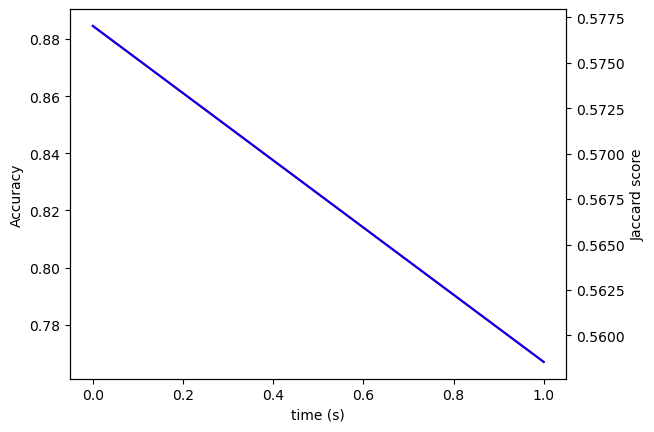

In [485]:
print(clf_instance.ACC_clfs)
print(clf_instance.JACCARD_clfs)
def two_scales(ax1, data1, data2, c1, c2):

    ax2 = ax1.twinx()

    ax1.plot(data1, color=c1)
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('Accuracy')

    ax2.plot(data2, color=c2)
    ax2.set_ylabel('Jaccard score')
# Create axes
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, (clf_instance.ACC_clfs[:]), (clf_instance.JACCARD_clfs[:]), 'r', 'b')
clf_instance.color_y_axis(ax1, 'r')
clf_instance.color_y_axis(ax2, 'b')
plt.show()

NameError: name 's1' is not defined

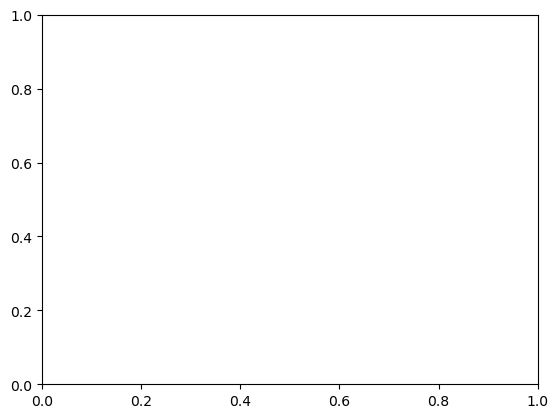

In [480]:
def two_scales(ax1, time, data1, data2, c1, c2):

    ax2 = ax1.twinx()

    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('Accuracy')

    ax2.plot(time, data2, color=c2)
    ax2.set_ylabel('Jaccard score')
    return ax1, ax2

# Create axes
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, s1, s2, 'r', 'b')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None

color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.show()

In [ ]:
stop

In [390]:
y = small_df['Target_tags']
mlb.fit_transform(y)
len(mlb.classes_)

22

In [391]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.3,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# BAG OF WORDS INSTANCE
bow_vect = CountVectorizer(stop_words=stop_w, max_df=0.95, min_df=1)
# TF-IDF INSTANCE
tf_vect = TfidfVectorizer(stop_words=stop_w, max_df=0.95, min_df=1)

#feat = 'Title_bow_lem'
#train_x = small_df[feat]
bow_fit = bow_vect.fit(X_train)
tf_fit = tf_vect.fit(X_train)

bow_transform = bow_vect.transform(X_train)  
tf_transform = tf_fit.transform(X_train)  
df_train_x = pd.DataFrame(tf_transform.todense(), columns=tf_vect.get_feature_names_out())

(df_train_x.loc[0, :]).isna()
mlb_y = mlb.fit_transform(y_train)
df = pd.DataFrame(mlb_y, columns=mlb.classes_)


clf = MultiOutputClassifier(LogisticRegression(C= 10.0, 
                                               penalty= 'l1', 
                                               solver= 'liblinear')).fit(df_train_x, mlb_y)
# clf.predict(X[-2:])

(2163,) (927,) (2163,) (927,)


In [392]:
print(accuracy_score(mlb_y, clf.predict((df_train_x))))
#X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.3,random_state=42, stratify=y.values)


0.9912159038372631


In [394]:
test_y =mlb.transform(y_test)
df_test_x = pd.DataFrame(tf_vect.transform(X_test).todense(), columns=tf_vect.get_feature_names_out())

print(accuracy_score(test_y, clf.predict((df_test_x))))
      #metrics.jaccard_score(y_test, clf.predict(X_test), ave))

0.3775620280474649


In [395]:
#
jaccard_score(test_y, clf.predict(df_test_x), average='weighted')

0.44019538272134695

In [372]:
#test_x = pd.DataFrame(tf_fit.transform(['Can I use react to develop an app on ios?']).todense(),
                      #columns=tf_vect.get_feature_names_out())
#densify(tf_fit.transform(['Can I use react to develop an app on ios?']), features=vocab)
#y_trial = clf.predict_proba(test_x)
print(mlb.classes_)
y_trial
#clf.predict(X[-2:])

['c#' 'c++' 'ios' 'java' 'javascript' 'php' 'python' 'ruby-on-rails']


[array([[0.99466535, 0.00533465]]),
 array([[0.99732184, 0.00267816]]),
 array([[0.94531966, 0.05468034]]),
 array([[0.99475557, 0.00524443]]),
 array([[0.84661869, 0.15338131]]),
 array([[0.9981087, 0.0018913]]),
 array([[0.98948434, 0.01051566]]),
 array([[0.99861628, 0.00138372]])]

## Test with different number of tags 

I need to filter the actual target in such a way that it will hold an x number of tags among its original ones that appears in the most 'common ones' of a given size (say, 22)

In [18]:
# Je recupere tous les elements dans chaque liste de chaque question (y etant composee de sous-listes)
flat_list=[item for sublist in y for item in sublist]
#flat_list 
#len(flat_list)
most_common_tags = [item[0] for item in Counter(flat_list).most_common()]
most_common_tags
#len(most_common_tags)
#list(y_train)[0][0]
#list(small_df['Tags_words'])

['java',
 'c#',
 'python',
 'javascript',
 'c++',
 'ios',
 'android',
 '.net',
 'html',
 'objective-c',
 'php',
 'iphone',
 'c',
 'jquery',
 'linux',
 'node.js',
 'asp.net',
 'sql',
 'ruby-on-rails',
 'windows',
 'multithreading',
 'xcode',
 'css',
 'c++11',
 'swift',
 'performance',
 'mysql',
 'spring',
 'django',
 'string',
 'sql-server',
 'unit-testing',
 'macos',
 'database',
 'arrays',
 'numpy',
 'asp.net-mvc',
 'image',
 'ruby',
 'ajax',
 'reactjs',
 'json',
 'python-3.x',
 'hibernate',
 'cocoa-touch',
 'r',
 'templates',
 'xml',
 'git',
 'eclipse',
 'algorithm',
 'wpf',
 'gcc',
 'security',
 'visual-studio',
 'ipad',
 'class',
 'swing',
 'language-lawyer',
 'regex',
 'function',
 'jpa',
 'cocoa',
 'pandas',
 'postgresql',
 'opencv',
 'angularjs',
 'python-2.7',
 'google-chrome',
 'validation',
 'maven',
 'testing',
 'spring-boot',
 'winforms',
 'ruby-on-rails-3',
 'asynchronous',
 'reflection',
 'debugging',
 'spring-mvc',
 'design-patterns',
 'bash',
 'api',
 'lambda',
 'asp.ne

In [21]:
def most_popular_tag(target_tags, tags_flat_list):
    copy_list = most_common_tags.copy()
    index_min_tag = len(copy_list)
    min_tag = ''
    number_of_tags=0
    list_target_tags =[]
    while (len(list_target_tags) < 3):
        for tag in target_tags:
            if copy_list.index(tag) < index_min_tag:
                index_min_tag = copy_list.index(tag)
                min_tag = tag
                list_target_tags.append(min_tag)
                copy_list.remove(min_tag)
            print(len(list_target_tags))
    return list_target_tags

#most_popular_tag(target_tags=['django','python',"c++", "java"], tags_flat_list=most_common_tags)
def reduce_list(tag_list):
    if len(tag_list)<3:
        return tag_list[0]
    else:
        return tag_list[:3]

In [22]:
yy = small_df['Tags_words'].apply(lambda x: reduce_list(x))
#most_popular_tag(tags_list[0], most_common_tags)

In [23]:
mlb_y = mlb.fit_transform(y)
mlb_y.shape

NameError: name 'mlb' is not defined

In [299]:
df = pd.DataFrame(mlb_y, columns=mlb.classes_)
df.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [214]:
tags_list = (small_df['Tags_words'].apply(lambda x: set(x)))
#pd.Series(tags_list).unique()
#len(tags_counter)
type(tags_list)

pandas.core.series.Series

In [225]:

most_common_tags.index("contenteditable")
#len(most_common_tags)

1623

In [164]:
most_common_tags_2 = most_common_tags.copy()
most_common_tags_2.remove('python')
most_common_tags_2
#stop
def most_popular_tag(tags, tags_flat_list):
    index_min_tag = len(most_common_tags)
    min_tag = ''
    for tag in tags:
        if tags_flat_list.index(tag) < index_min_tag:
            index_min_tag = tags_flat_list.index(tag)
            min_tag = tag
    return min_tag

['c#',
 'java',
 'javascript',
 'c++',
 'ios',
 'android',
 '.net',
 'c',
 'objective-c',
 'iphone',
 'php',
 'html',
 'jquery',
 'linux',
 'node.js',
 'sql',
 'asp.net',
 'performance',
 'windows',
 'ruby-on-rails',
 'css',
 'xcode',
 'c++11',
 'multithreading',
 'mysql',
 'spring',
 'json',
 'swift',
 'unit-testing',
 'wpf',
 'asp.net-mvc',
 'sql-server',
 'ruby',
 'django',
 'r',
 'gcc',
 'image',
 'string',
 'arrays',
 'ajax',
 'visual-studio',
 'pandas',
 'macos',
 'python-3.x',
 'cocoa-touch',
 'git',
 'winforms',
 'debugging',
 'reactjs',
 'angularjs',
 'templates',
 'ios7',
 'database',
 'qt',
 'google-chrome',
 'postgresql',
 'testing',
 'bash',
 'numpy',
 'algorithm',
 'hibernate',
 'eclipse',
 'security',
 'authentication',
 'optimization',
 'entity-framework',
 'ipad',
 'python-2.7',
 'junit',
 'spring-boot',
 'linq',
 'rest',
 'android-studio',
 'http',
 'user-interface',
 'web-services',
 'asynchronous',
 'java-8',
 'amazon-web-services',
 'api',
 'mongodb',
 'datetime',


In [151]:
i_i=0
a='a'
while i_i<4:
    print(a) 
    i_i+=1
    

a
a
a
a


In [259]:
#print(y)
# convert y into a matrix of samplesXnumber_of_features with 2 classes : 0 or 1 ==> number of columns of mlb_y will be the same as 
# the total number of different tags present in all the list of y
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.3,random_state=42, stratify=y)

mlb_ytrain = mlb.fit_transform(y_train)
print(mlb_ytrain.shape)
mlb_ytrain


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [108]:
#small_df['unique_commn_tag'].value_counts()
from collections import Counter
flat_list = list(small_df['unique_rare_tag'])
# because all most_common unique tags are 22
rarest_tags = [item[0] for item in Counter(flat_list).most_common(80)]
(list(small_df['unique_commn_tag'].unique()) + rarest_tags)

TAGSlist_to_predict = list(small_df['unique_commn_tag'].unique()) + rarest_tags
TAGSlist_to_predict

['javascript',
 'python',
 'c++',
 'java',
 'ios',
 'ruby-on-rails',
 'c#',
 'php',
 'linux',
 'android',
 'c',
 'html',
 'windows',
 'asp.net',
 'jquery',
 '.net',
 'objective-c',
 'iphone',
 'r',
 'git',
 'sql',
 'node.js',
 'memory-leaks',
 'ipad',
 'subprocess',
 'plugins',
 'ajax',
 'visual-studio-2012',
 'datagridview',
 'apple-push-notifications',
 'tomcat',
 'jackson',
 'controller',
 'semaphore',
 'structure',
 'deserialization',
 'date',
 'twitter-bootstrap',
 'webview',
 'hive',
 'timing',
 'asp.net-web-api',
 'asp.net-web-api2',
 'allocator',
 'solaris',
 'command-line-interface',
 'ipython',
 'owin',
 'micro-optimization',
 'protocol-buffers',
 'resize',
 'clipboard',
 'c#-3.0',
 'wcf',
 'javafx',
 'webclient',
 'amazon-sqs',
 'cpu-usage',
 'task',
 'razor',
 'ruby-on-rails-3.2',
 'orm',
 'jersey-2.0',
 'laravel-5',
 'short',
 'java-metro-framework',
 'properties',
 'boost-asio',
 'prepared-statement',
 'sql-server-2005',
 'time',
 'autolayout',
 'visual-studio-2008',
 'de

In [258]:
#df=pd.DataFrame(mlb_ytrain, columns=mlb.classes_)
df[TAGSlist_to_predict[:10]]

,javascript,python,c++,java,ios,ruby-on-rails,c#,php,linux,android
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2158,0,0,0,0,0,0,1,0,0,0
2159,0,0,0,0,0,0,0,0,0,0
2160,0,0,0,0,0,0,1,0,0,0
2161,0,0,0,1,0,0,0,0,0,0


In [ ]:
list(small_df.unique_tag.unique())
common_tags_target = df[list(small_df.unique_tag.unique())]

In [ ]:
df = pd.DataFrame(mlb_y, columns=mlb.classes_)
df[TAGSlist_to_predict[:5]]
new_y=df[TAGSlist_to_predict[:5]].values
new_y.shape
#df[df.columns.isin(TAGSlist_to_predict)]

In [ ]:
TAGSlist_to_predict[:5]

In [ ]:
list_mlb=[]
for class_of_interest in TAGSlist_to_predict:
    # Choose a specific class for showing the ROC curve
#    class_of_interest = "c#"
    class_id = np.flatnonzero(mlb.classes_ == class_of_interest)[0]
    print(mlb_y[:,class_id])
    list_mlb.append((mlb_y[:,class_id]).T)
#mlb.classes_[class_id] for class_id in 

In [ ]:
pd.DataFrame(list_mlb)

In [ ]:
#Il faut enlever les autres tags du test set initial pour le calcul des scores!!!
new_y = mlb_y[:, :10]
print(new_y.shape)
new_y
print(mlb.classes_[:10])

In [ ]:
ytags_list = []
for numb_tags in np.array([5, 10, 100]):
    ytags_list.append(new_y[:, :numb_tags])
ytags_list

In [261]:
metrics

array([0.55339806, 0.51456311, 0.51132686, 0.56796117, 0.59708738])

In [ ]:
import warnings

warnings.simplefilter('always', UserWarning)



In [ ]:
classifiers = []
acc = []
numb_tags = 0
    # BAG OF WORDS INSTANCE
bow_vect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
# TF-IDF INSTANCE
tf_vect = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)
#df = pd.DataFrame(mlb_y, columns=mlb.classes_)
for numb_tags in np.array([1, 2, 3]):
    #classif = OneVsRestClassifier(SVC(kernel="linear", probability=True))
    # mettre tags_list ici
    # Create a list of corresponding size:
    new_y=df[TAGSlist_to_predict[:numb_tags]].values
    new_y.shape
    #new_y=mlb_y[:, :numb_tags]
    # DATA SPLIT INTO TEST AND GRAIN
    X_train, X_test, y_train,  y_test = train_test_split(X, new_y, test_size=0.3)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    bow_fit = bow_vect.fit(X_train)
    tf_fit = tf_vect.fit(X_train)
    bow_transform = bow_vect.transform(X_train)  
    tf_transform = tf_vect.transform(X_train)
    df_train_x = pd.DataFrame(tf_transform.todense(), columns=tf_vect.get_feature_names_out())
    df_test_x = pd.DataFrame(tf_vect.transform(X_test).todense(), columns=tf_vect.get_feature_names_out())

    tags_classif = classif.fit(df_train_x, y_train)
    print(warnings.catch_warnings)
    classifiers.append(tags_classif)
    acc.append(metrics.accuracy_score(y_test, tags_classif.predict((df_test_x))))

In [ ]:
#mlb.classes_[:numb_tags]
print(acc)
plt.plot(np.array([1, 2, 3]),acc)

might as well choose to predict 10 tags
plot accuracy with number of predicted tag per query

On ne peut pas predire plus de tags que le seuil de bon conditionnement de la matrix X!!!!

In [ ]:
#common_tags_target.columns
pd.DataFrame(classif_lr.predict(test_vct), columns= common_tags_target.columns)

In [ ]:
print(classification_report(y_test, classif_lr.predict((df_test_x))))

In [ ]:
y_test.shape

In [ ]:
new_y=df[TAGSlist_to_predict[:1]]
X_train, X_test, y_train,  y_test = train_test_split(X, new_y, test_size=0.3,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
stop

## Build model using SVC

In [317]:
# DATA SPLIT INTO TEST AND GRAIN
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.3,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#classif = OneVsRestClassifier(SVC(kernel="linear", probability=True))
#classif.fit(df_train_x, y_train)


(2163,) (927,) (2163,) (927,)


In [318]:
# BAG OF WORDS INSTANCE
bow_vect = CountVectorizer(stop_words=stop_w, max_df=0.95, min_df=1)
# TF-IDF INSTANCE
tf_vect = TfidfVectorizer(stop_words=stop_w, max_df=0.95, min_df=1)

#feat = 'Title_bow_lem'
#train_x = small_df[feat]
bow_fit = bow_vect.fit(X_train)
tf_fit = tf_vect.fit(X_train)

bow_transform = bow_vect.transform(X_train)  
tf_transform = tf_vect.transform(X_train)  

In [319]:
df_train_x = pd.DataFrame(tf_transform.todense(), columns=tf_vect.get_feature_names_out())

(df_train_x.loc[0, :]).isna()

00                 False
000                False
0000               False
000000             False
00000000           False
                   ...  
नसल                False
ㅤㅤㅤㅤㅤ              False
圣诞节聚会被断电及抢走物品      False
浙江家庭教会五十人遭驱散及抓打    False
视频                 False
Name: 0, Length: 34935, dtype: bool

In [320]:
df_train_x.shape

(2163, 34935)

In [323]:
mlb_y = mlb.fit_transform(y_train)

In [324]:
mlb_y.shape

(2163, 3324)

In [ ]:
df_test_x = pd.DataFrame(tf_vect.transform(X_test).todense(),  
                         columns=tf_vect.get_feature_names_out())
df_test_x

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
svc_classif = OneVsRestClassifier(SVC(kernel="linear", probability=True))
svc_classif.fit(df_train_x, mlb_y)
sorted(svc_classif.predict_proba(df_test_x)[0])

In [ ]:
y_pred = classif.predict_proba(df_test_x)
sorted(classif.predict_proba(df_test_x)[:10])

In [ ]:
metrics.accuracy_score(y_test, classif.predict((df_test_x)))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, classif.predict(df_test_x)))

In [ ]:
def execute_svm(X, y, svm_gamma):

    # DATA SPLIT INTO TEST AND GRAIN
    X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.3)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    # DATA STANDARDIZATION
    #scaler = preprocessing.StandardScaler().fit(X_train)
    #X_train_std = scaler.transform(X_train)
    #X_test_std = scaler.transform(X_test)
    # INSTANCIATE A CLASSIFIER
    classif = OneVsRestClassifier(SVC(kernel="rbf"))
    #classifier = LogisticRegression(multi_class='multinomial',solver ='newton-cg').fit(X_train,y_train)
    #classifier = svm.SVC(C=1.0, kernel='rbf', gamma=svm_gamma)
    # TRAIN THE CLASSIFIER
    classif.fit(X_train, y_train)
    #classifier.fit(X_train, y_train)
   
    # CROSS-VALIDATION TO CHOOSE GAMMA!
    # choisir 6 valeurs pour C, entre 1e-2 et 1e3
    #C_range = np.logspace(-2, 3, 6)

    # choisir 4 valeurs pour gamma, entre 1e-2 et 10
    #gamma_range = np.logspace(-2, 1, 4)

    # grille de paramètres
    param_grid = {'n_jobs': [1],
                 'verbose':[0
                           ]}
    #{'C': C_range, 'gamma': gamma_range}

    # critère de sélection du meilleur modèle
    score = 'roc_auc'

    # initialiser une recherche sur grille
    grid = model_selection.GridSearchCV(OneVsRestClassifier(SVC(kernel="linear")), 
                                        param_grid, 
                                        cv=3, # 5 folds de validation croisée  
                                        scoring=score)

    # faire tourner la recherche sur grille
    grid.fit(X_train, y_train)

    # afficher les paramètres optimaux
    print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_, grid.best_score_))
    # prédire sur le jeu de test avec le modèle optimisé
    y_test_pred_cv = grid.decision_function(X_train)


    return classif, y_test, X_test


In [ ]:
ecg_classifier, y_test, X_test_std =execute_svm(df_train_x,new_y, 50)

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)

In [ ]:
#from sklearn.datasets import make_multilabel_classification
#X, Y = make_multilabel_classification(n_samples=12, n_classes=3, random_state=0)
print(y_train)
print(Y)
#chain.fit(X_train, Y_train).predict(X_test)


choose enough tags to cover 90% par question --> matrice de vecteurs, embedded in multilabel binarizer
BERT adaptera la derniere couche pour , pour passer des probas pour predire plusieurs labels vers le output?
pytorch pour BERT -- FASTAI = keras for pytorch 

# TP_2: OneVsRest and OneVsOneClassifer 
--> voir notebook 'TPs_Classification_and_non-linear_ML'